<h2 style='color:red' align="center">Decision Tree Classification</h2>

- Decision Tree is a Supervised learning technique that can be used for both `classification and Regression problems`
-  internal nodes represent the `features of a dataset`, branches represent the `decision rules` and each `leaf node represents the outcome`.
- In a Decision tree, there are `two nodes`, which are the `Decision Node` and `Leaf Node`. 
- Decision nodes are used to make `any decision and have multiple branches`, 
#
- where as `Leaf nodes are the output of those decisions and do not contain any further branches`.
- The decisions or the test are performed on the `basis of features of the given dataset`.
- It is a graphical representation for `getting all the possible solutions to a problem/decision based on given conditions.`
#
- In order to build a tree, we use the `CART algorithm`, which stands for `Classification and Regression Tree algorithm`.

#### Decision tree:

- A decision tree is a supervised machine learning technique that `models decisions, outcomes, and predictions by using a flowchart-like tree structure`.
- Such a tree is constructed via an algorithmic process (set of `if-else statements`) that identifies ways to `split, classify, and visualize a dataset based on different conditions`.

<img src= https://images.spiceworks.com/wp-content/uploads/2022/05/04131724/How-does-a-decision-tree-work.png>

Note: A decision tree can contain categorical data (YES/NO) as well as numeric data.

#

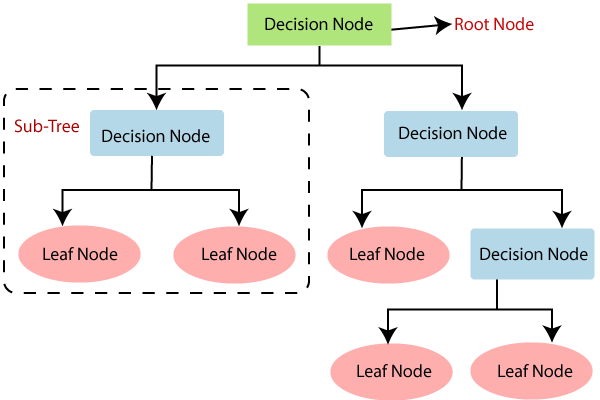

#
- Step-1: Begin the tree with the `root node, says S, which contains the complete dataset`.
- Step-2: Find the `best attribute in the dataset using Attribute Selection Measure (ASM)`.
- Step-3: Divide the S into subsets that contains `possible values for the best attributes`.
- Step-4: Generate the decision tree node, `which contains the best attribute`.
- Step-5: Recursively make `new decision trees using the subsets of the dataset created in step -3.` 
#
Continue this process `until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node`

<img src = https://images.spiceworks.com/wp-content/uploads/2022/05/12043057/Buying-a-Car.png>

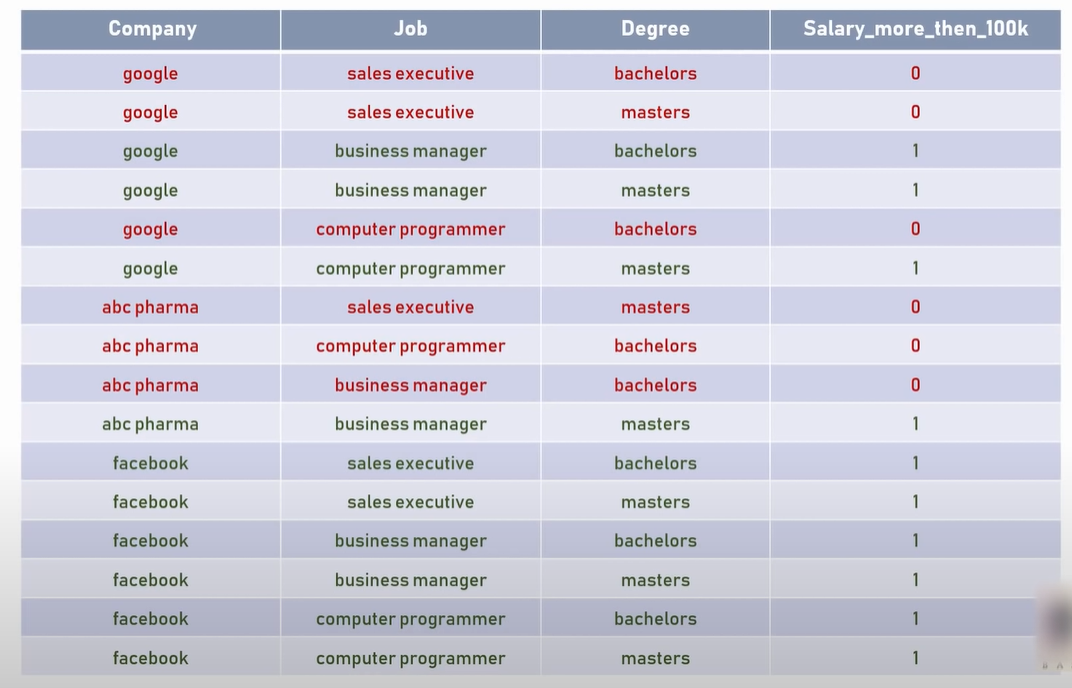

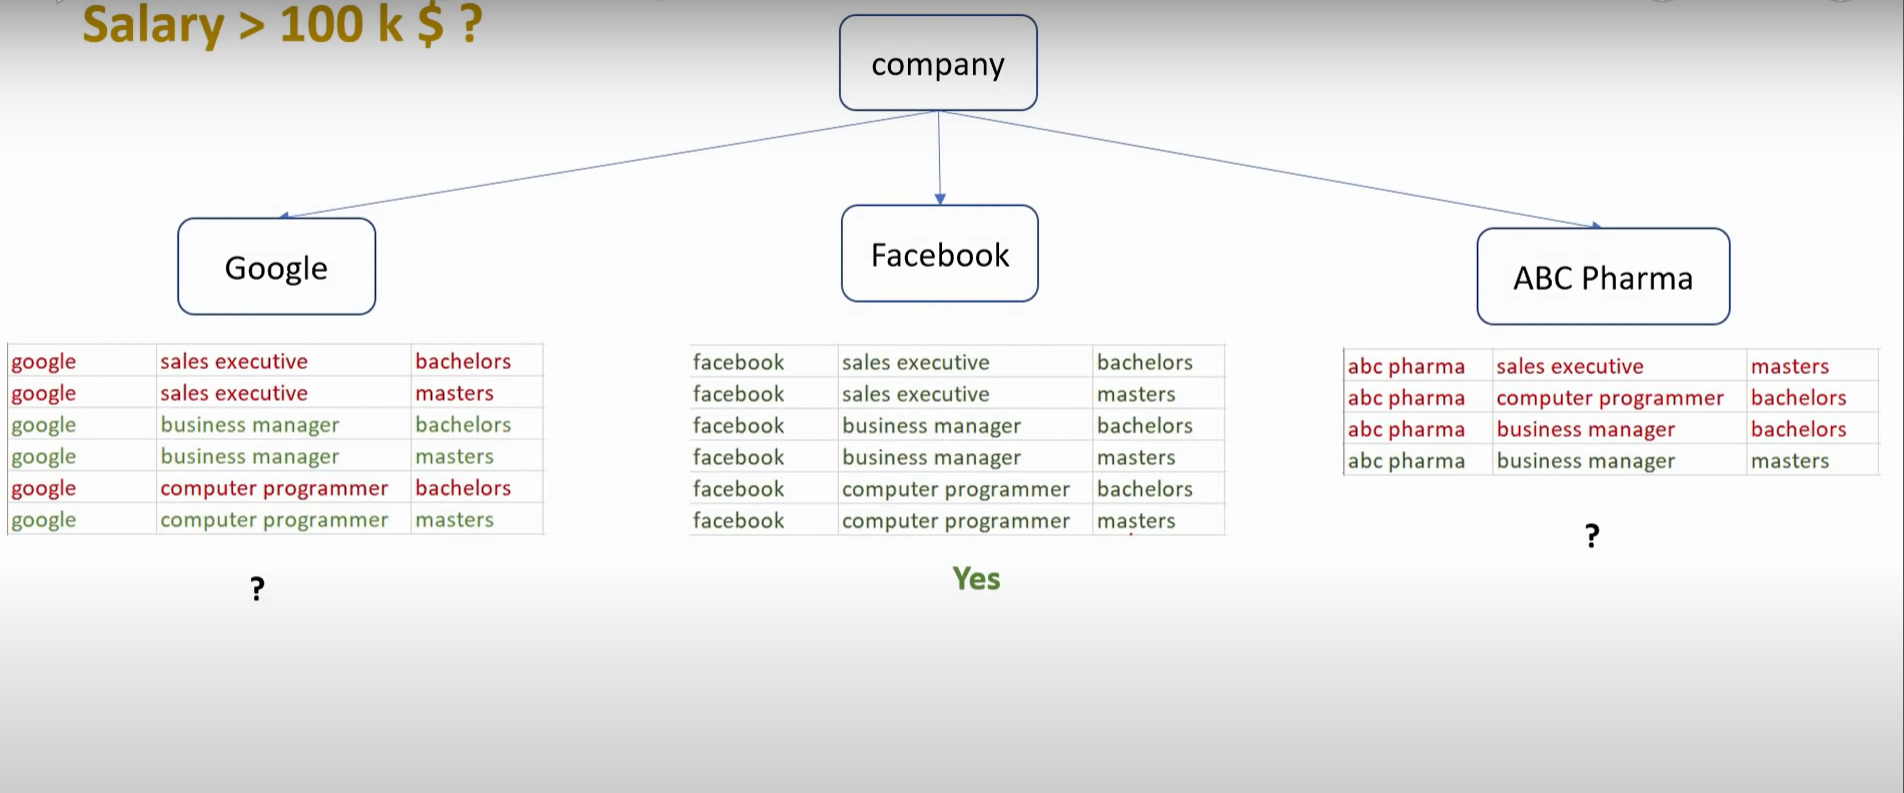

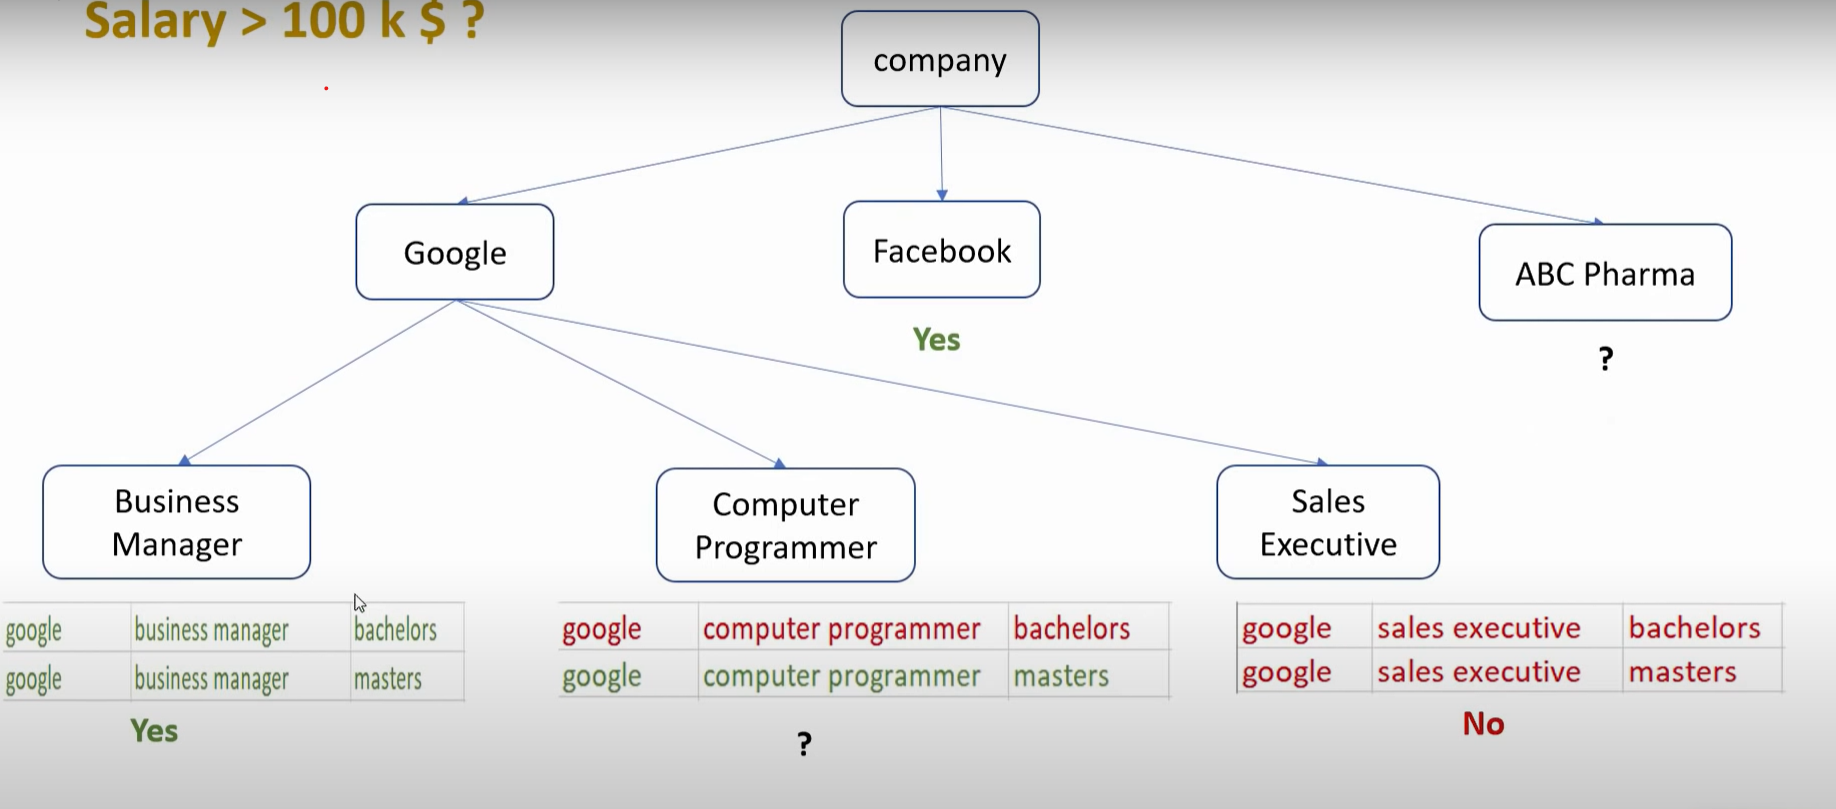

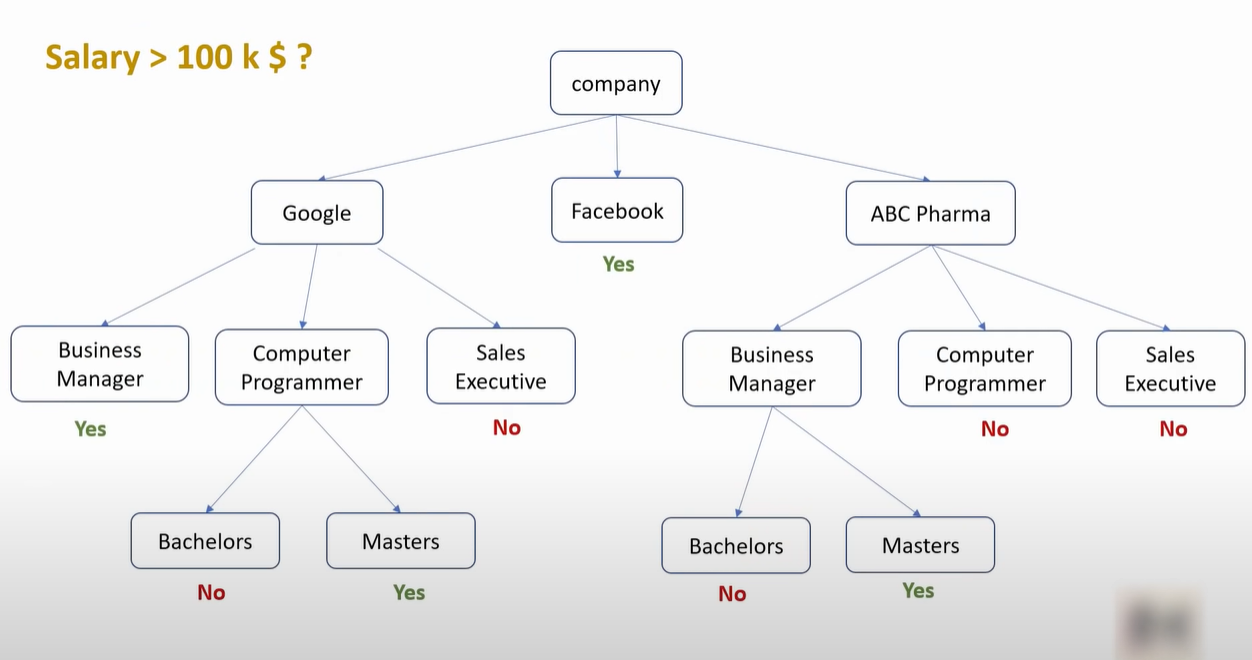

# How do you select ordering of features?

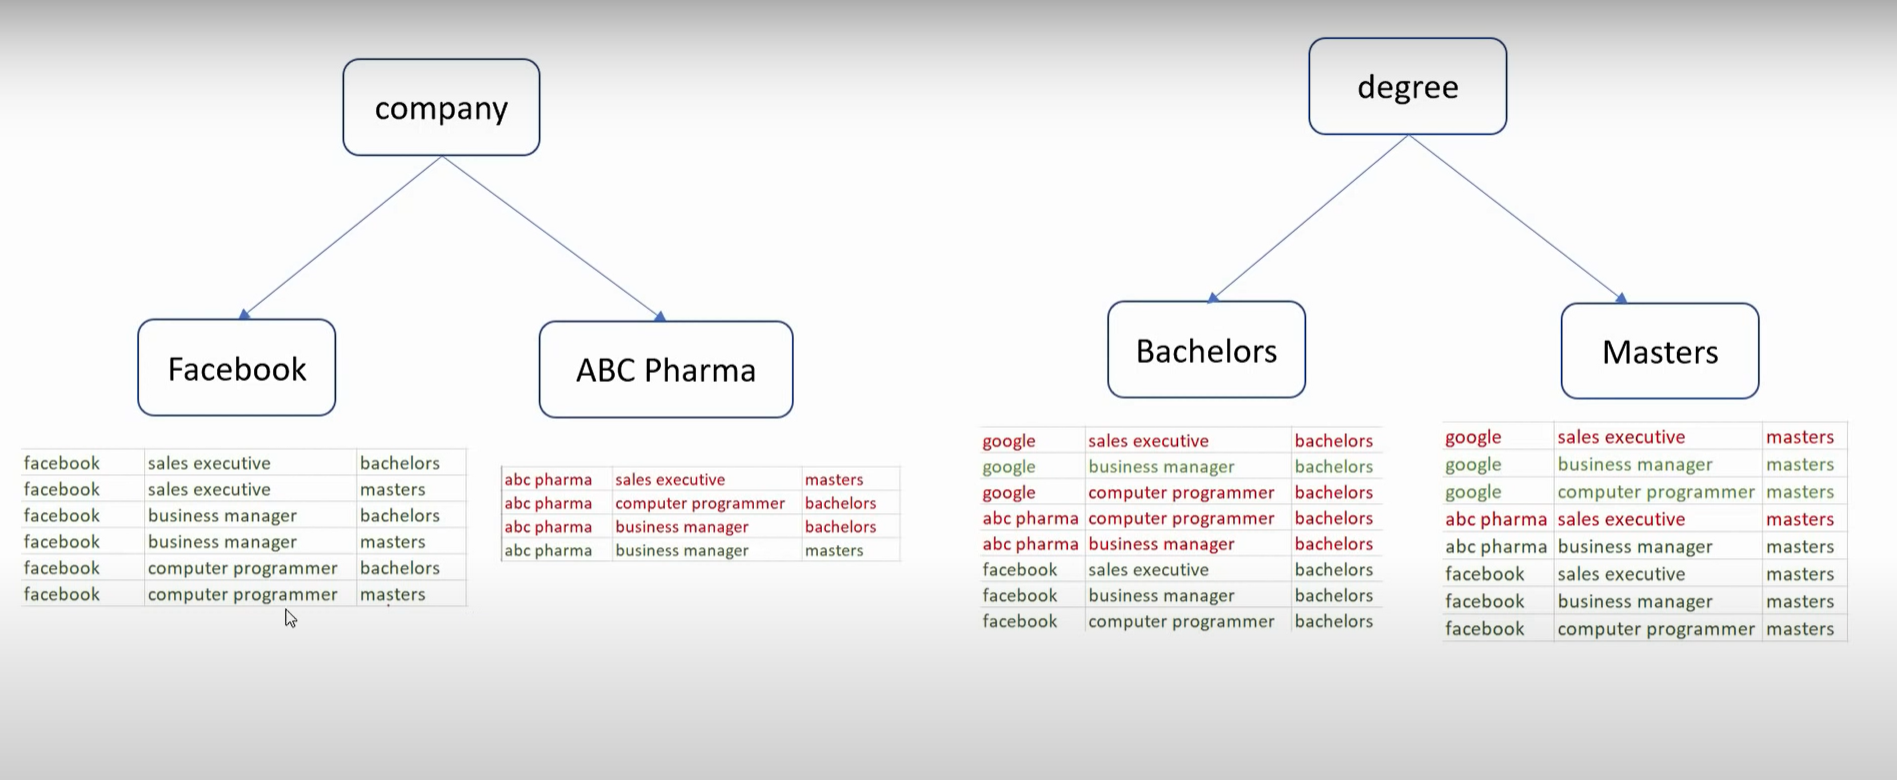

# Entropy:
- Entropy is the measure of the degree of randomness or uncertainty in the dataset. In the case of classifications, 
- It measures the randomness based on the distribution of class labels in the dataset.

- The entropy for a subset of the original dataset having K number of classes for the ith node can be defined as:



Where,

- S is the dataset sample.
- k is the particular class from K classes
- p(k) is the proportion of the data points that belong to class k to the total number of data points in dataset sample S. 

- Here p(i,k) should not be equal to zero

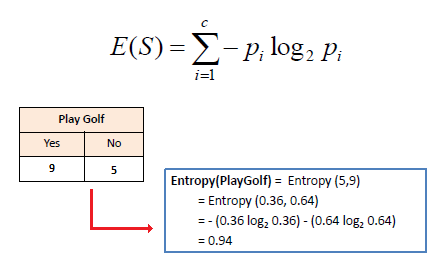

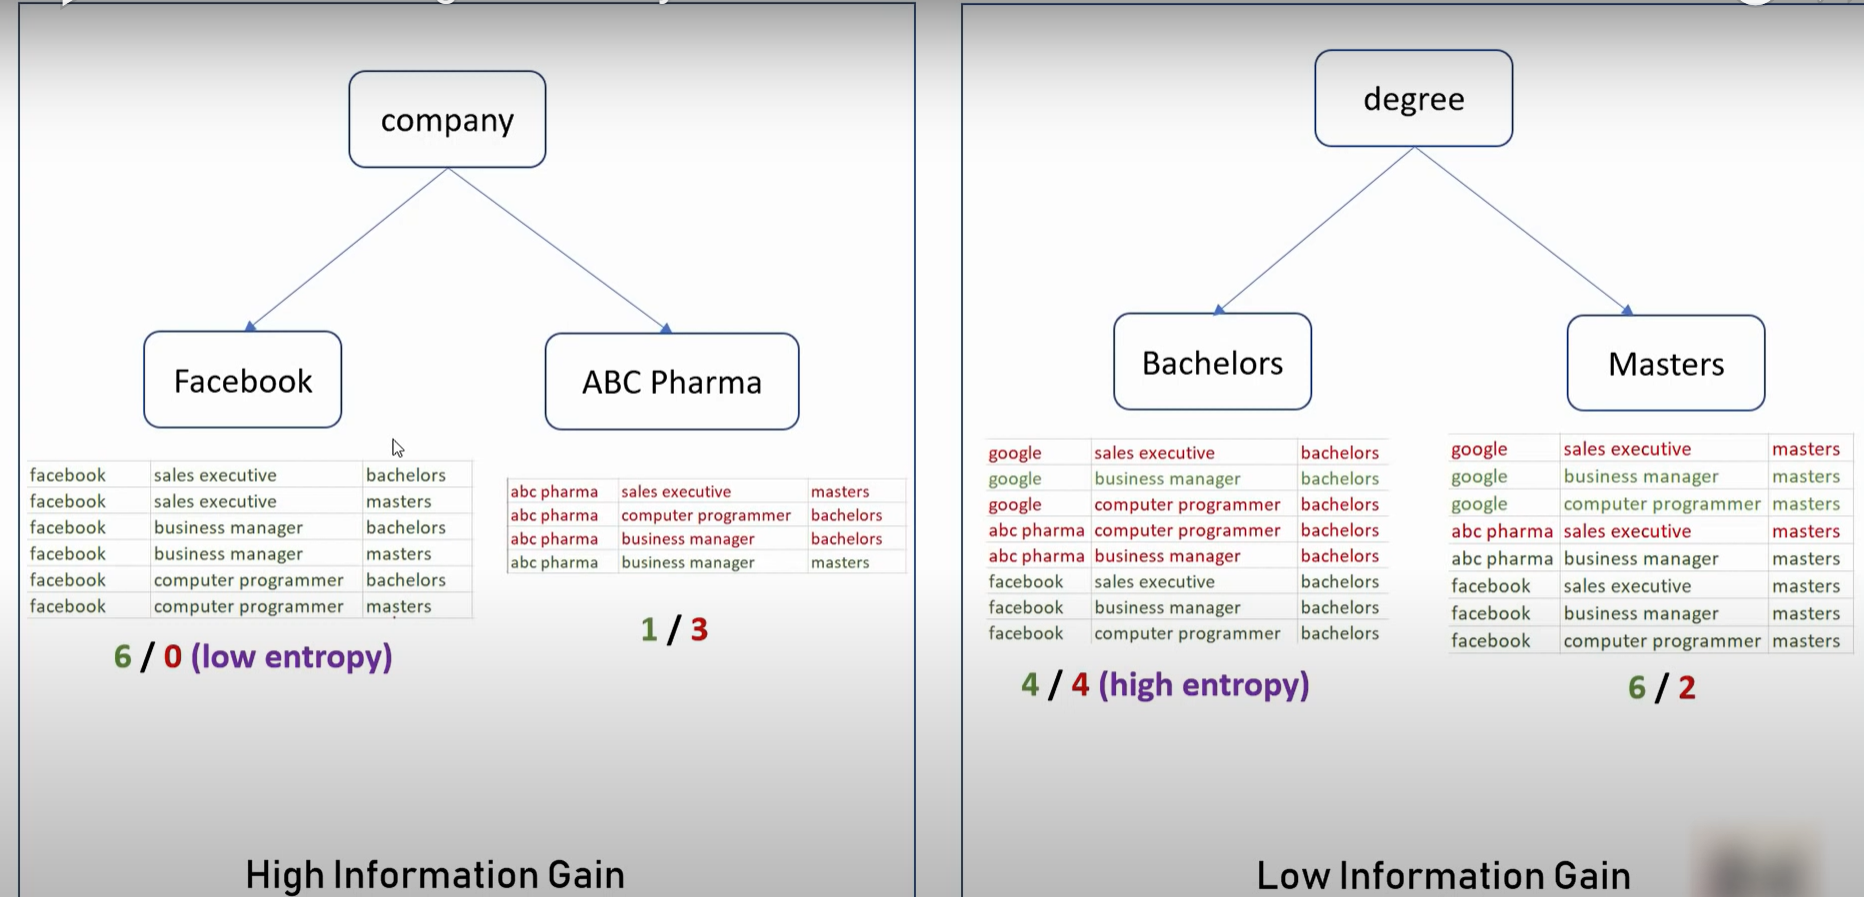

## Information Gain: 
- Information gain is a `measure of the reduction in impurity achieved by splitting a dataset on a particular feature in a decision tree`. 
- The splitting criterion is determined by the `feature that offers the greatest information gain` 
- It is used to determine the most informative feature to `split on at each node of the tree`, with the `goal of creating pure subsets`

Impurity in the dataset whenever split the sample like most of the case are red and it almost red one with little imupurity amd low entropy in the side   

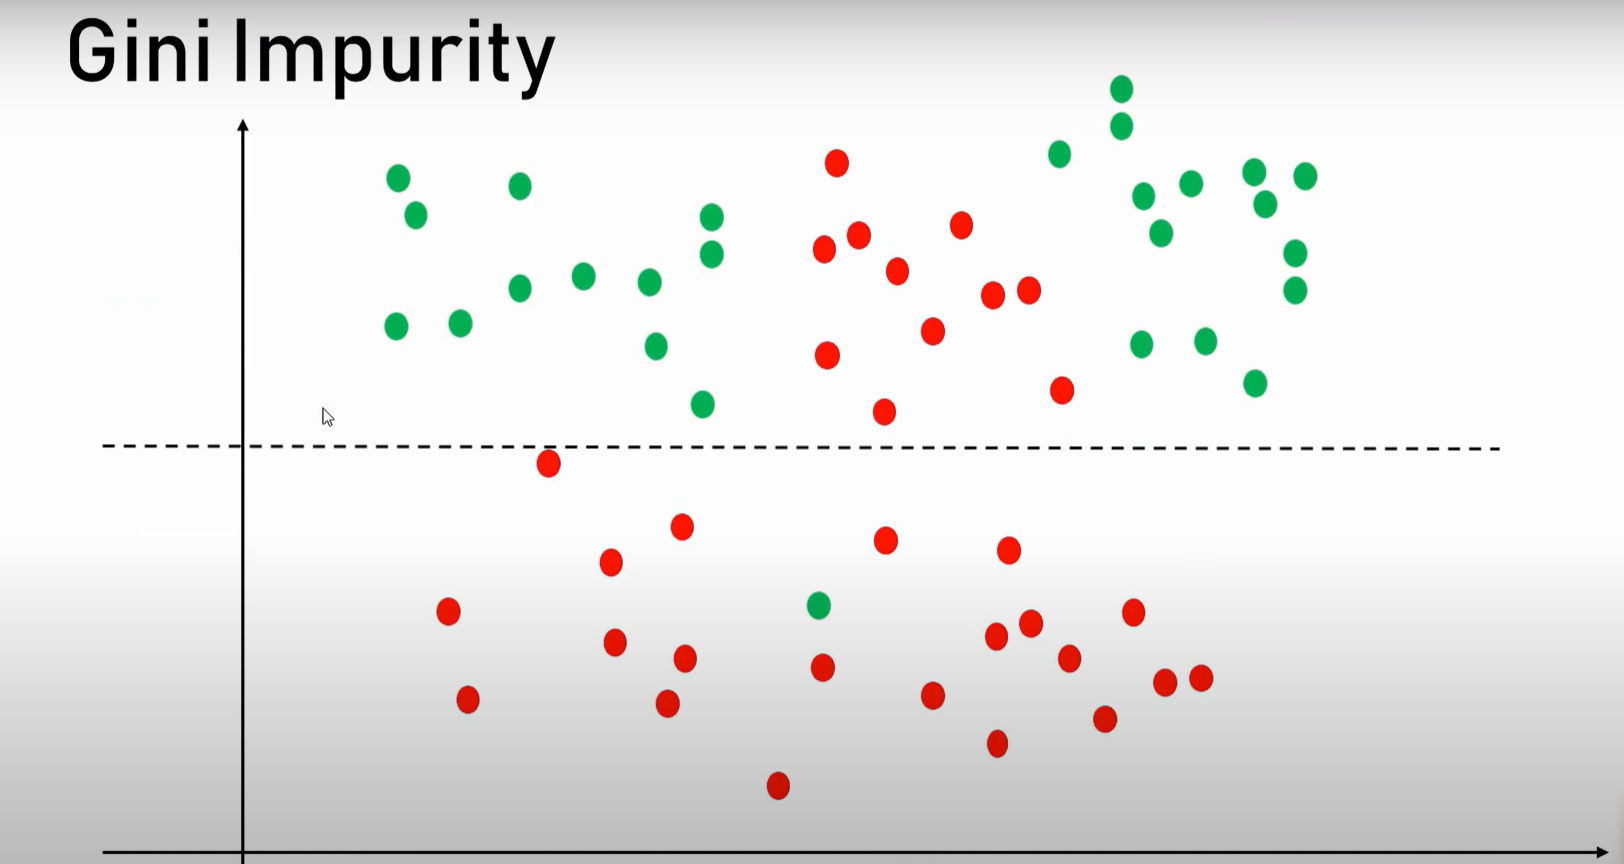

# Gini Impurity or index:
- Gini Impurity is a score that evaluates `how accurate a split is among the classified groups. `
- The Gini Impurity evaluates a score in the range between 0 and 1, where 0 is when all observations belong to one class, and 1 is a random distribution of the elements within classes. 
- In this case, we want to have a `Gini index score as low as possible`. 
- Gini Index is the `evaluation metric we shall use to evaluate our Decision Tree Model.`


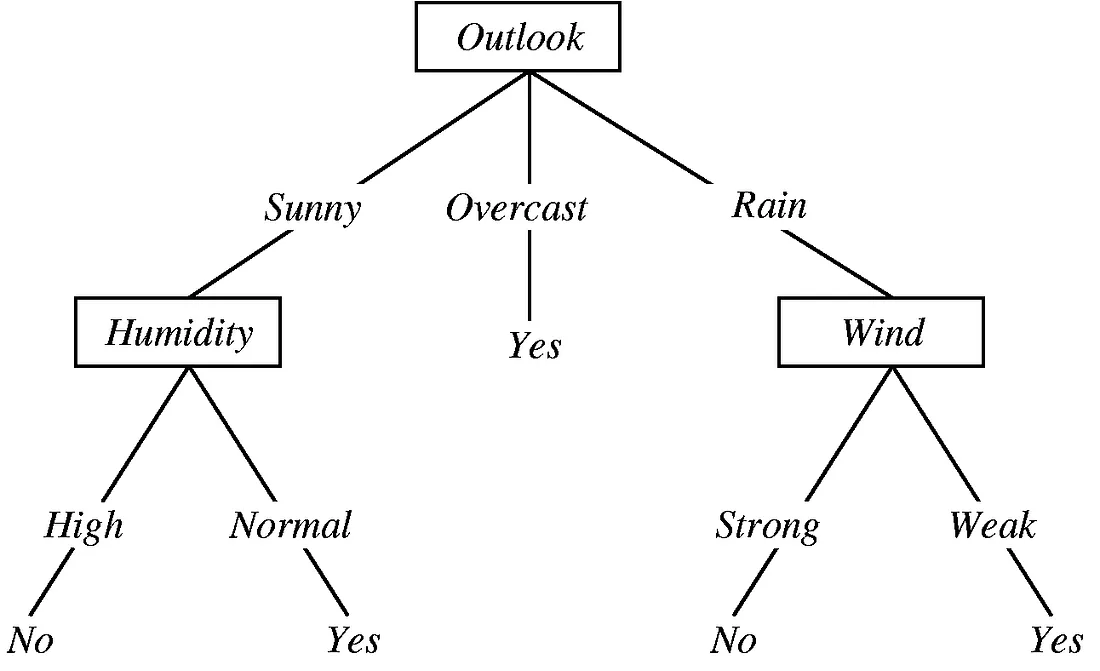

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Create a DataFrame with the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [4]:
df = pd.DataFrame(data)
print(df)

     Outlook Temperature Humidity  Windy PlayTennis
0      Sunny         Hot     High  False         No
1      Sunny         Hot     High   True         No
2   Overcast         Hot     High  False        Yes
3      Rainy        Mild     High  False        Yes
4      Rainy        Cool   Normal  False        Yes
5      Rainy        Cool   Normal   True         No
6   Overcast        Cool   Normal   True        Yes
7      Sunny        Mild     High  False         No
8      Sunny        Cool   Normal  False        Yes
9      Rainy        Mild   Normal  False        Yes
10     Sunny        Mild   Normal   True        Yes
11  Overcast        Mild     High   True        Yes
12  Overcast         Hot   Normal  False        Yes
13     Rainy        Mild     High   True         No


In [5]:
#Convert categorical variables to numerical
df_encoded = pd.get_dummies(df[['Outlook', 'Temperature', 'Humidity', 'Windy']], drop_first=False)
df_encoded['PlayTennis'] = df['PlayTennis'].map({'No': 0, 'Yes': 1})

In [6]:
df_encoded

Windy  Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temperature_Cool  \
0   False                 0              0              1                 0   
1    True                 0              0              1                 0   
2   False                 1              0              0                 0   
3   False                 0              1              0                 0   
4   False                 0              1              0                 1   
5    True                 0              1              0                 1   
6    True                 1              0              0                 1   
7   False                 0              0              1                 0   
8   False                 0              0              1                 1   
9   False                 0              1              0                 0   
10   True                 0              0              1                 0   
11   True                 1              0              0                 0   
12  False                 1              0              0                 0   
13   True                 0              1              0                 0   

    Temperature_Hot  Temperature_Mild  Humidity_High  Humidity_Normal  \
0                 1                 0              1                0   
1                 1                 0              1                0   
2                 1                 0              1                0   
3                 0                 1              1                0   
4                 0                 0              0                1   
5                 0                 0              0                1   
6                 0                 0              0                1   
7                 0                 1              1                0   
8                 0                 0              0                1   
9                 0                 1              0                1   
10                0                 1              0                1   
11                0                 1              1                0   
12                1                 0              0                1   
13                0                 1              1                0   

    PlayTennis  
0            0  
1            0  
2            1  
3            1  
4            1  
5            0  
6            1  
7            0  
8            1  
9            1  
10           1  
11           1  
12           1  
13           0

In [7]:
#Split the data into features (X) and target variable (y)
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']
print(X,y)

    Windy  Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temperature_Cool  \
0   False                 0              0              1                 0   
1    True                 0              0              1                 0   
2   False                 1              0              0                 0   
3   False                 0              1              0                 0   
4   False                 0              1              0                 1   
5    True                 0              1              0                 1   
6    True                 1              0              0                 1   
7   False                 0              0              1                 0   
8   False                 0              0              1                 1   
9   False                 0              1              0                 0   
10   True                 0              0              1                 0   
11   True                 1              0          

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [10]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Make predictions on the test set
predictions = clf.predict(X_test)
predictions

array([1, 1, 0], dtype=int64)

In [12]:
# Display the accuracy of the model
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 1.0


<img src = https://lh6.googleusercontent.com/-Hg2kFSKMrQKRsCsmfW6yCtW9JBJqRLAXsx3fO5s0Xu6RykSesijcBsGMqI2tFwOGUKQ6kNfVVdDWHwfDhFEzlchSGbad6wxB5GBMYPALDP821K6lMAS9l59QibHggMqYOS5OHzf>

In [14]:
import pandas as pd

In [17]:
import os
os.getcwd()
os.chdir('C:\\Users\\ELCOT\\Downloads')

In [44]:
df = pd.read_csv("salaries.csv")
df

company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors                      1
13    facebook     business manager    masters                      1
14    facebook  computer programmer  bachelors                      1
15    facebook  computer programmer    masters                      1

In [45]:
x = df.drop('salary_more_then_100k',axis=1)
x

company                  job     degree
0       google      sales executive  bachelors
1       google      sales executive    masters
2       google     business manager  bachelors
3       google     business manager    masters
4       google  computer programmer  bachelors
5       google  computer programmer    masters
6   abc pharma      sales executive    masters
7   abc pharma  computer programmer  bachelors
8   abc pharma     business manager  bachelors
9   abc pharma     business manager    masters
10    facebook      sales executive  bachelors
11    facebook      sales executive    masters
12    facebook     business manager  bachelors
13    facebook     business manager    masters
14    facebook  computer programmer  bachelors
15    facebook  computer programmer    masters

In [46]:
y  = df['salary_more_then_100k']
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

# machine learning algo only knows the number so  we have to convert label to numerical values

In [47]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [48]:
df["company"]

0         google
1         google
2         google
3         google
4         google
5         google
6     abc pharma
7     abc pharma
8     abc pharma
9     abc pharma
10      facebook
11      facebook
12      facebook
13      facebook
14      facebook
15      facebook
Name: company, dtype: object

In [49]:
df['company_new'] = le_company.fit_transform(x['company'])
df
# google - 2
# abc_pharamcy - 0
#facebook - 1

company                  job     degree  salary_more_then_100k  \
0       google      sales executive  bachelors                      0   
1       google      sales executive    masters                      0   
2       google     business manager  bachelors                      1   
3       google     business manager    masters                      1   
4       google  computer programmer  bachelors                      0   
5       google  computer programmer    masters                      1   
6   abc pharma      sales executive    masters                      0   
7   abc pharma  computer programmer  bachelors                      0   
8   abc pharma     business manager  bachelors                      0   
9   abc pharma     business manager    masters                      1   
10    facebook      sales executive  bachelors                      1   
11    facebook      sales executive    masters                      1   
12    facebook     business manager  bachelors                      1   
13    facebook     business manager    masters                      1   
14    facebook  computer programmer  bachelors                      1   
15    facebook  computer programmer    masters                      1   

    company_new  
0             2  
1             2  
2             2  
3             2  
4             2  
5             2  
6             0  
7             0  
8             0  
9             0  
10            1  
11            1  
12            1  
13            1  
14            1  
15            1

In [50]:
df["job"]

0         sales executive
1         sales executive
2        business manager
3        business manager
4     computer programmer
5     computer programmer
6         sales executive
7     computer programmer
8        business manager
9        business manager
10        sales executive
11        sales executive
12       business manager
13       business manager
14    computer programmer
15    computer programmer
Name: job, dtype: object

In [51]:
df['job_new'] = le_job.fit_transform(x['job'])
df

# sales - 2
# business - 0
# programmer - 1

company                  job     degree  salary_more_then_100k  \
0       google      sales executive  bachelors                      0   
1       google      sales executive    masters                      0   
2       google     business manager  bachelors                      1   
3       google     business manager    masters                      1   
4       google  computer programmer  bachelors                      0   
5       google  computer programmer    masters                      1   
6   abc pharma      sales executive    masters                      0   
7   abc pharma  computer programmer  bachelors                      0   
8   abc pharma     business manager  bachelors                      0   
9   abc pharma     business manager    masters                      1   
10    facebook      sales executive  bachelors                      1   
11    facebook      sales executive    masters                      1   
12    facebook     business manager  bachelors                      1   
13    facebook     business manager    masters                      1   
14    facebook  computer programmer  bachelors                      1   
15    facebook  computer programmer    masters                      1   

    company_new  job_new  
0             2        2  
1             2        2  
2             2        0  
3             2        0  
4             2        1  
5             2        1  
6             0        2  
7             0        1  
8             0        0  
9             0        0  
10            1        2  
11            1        2  
12            1        0  
13            1        0  
14            1        1  
15            1        1

In [52]:
df['degree_new'] = le_degree.fit_transform(x['degree'])
df
# bachelors - 0 
# masters - 1

company                  job     degree  salary_more_then_100k  \
0       google      sales executive  bachelors                      0   
1       google      sales executive    masters                      0   
2       google     business manager  bachelors                      1   
3       google     business manager    masters                      1   
4       google  computer programmer  bachelors                      0   
5       google  computer programmer    masters                      1   
6   abc pharma      sales executive    masters                      0   
7   abc pharma  computer programmer  bachelors                      0   
8   abc pharma     business manager  bachelors                      0   
9   abc pharma     business manager    masters                      1   
10    facebook      sales executive  bachelors                      1   
11    facebook      sales executive    masters                      1   
12    facebook     business manager  bachelors                      1   
13    facebook     business manager    masters                      1   
14    facebook  computer programmer  bachelors                      1   
15    facebook  computer programmer    masters                      1   

    company_new  job_new  degree_new  
0             2        2           0  
1             2        2           1  
2             2        0           0  
3             2        0           1  
4             2        1           0  
5             2        1           1  
6             0        2           1  
7             0        1           0  
8             0        0           0  
9             0        0           1  
10            1        2           0  
11            1        2           1  
12            1        0           0  
13            1        0           1  
14            1        1           0  
15            1        1           1

In [53]:
df

company                  job     degree  salary_more_then_100k  \
0       google      sales executive  bachelors                      0   
1       google      sales executive    masters                      0   
2       google     business manager  bachelors                      1   
3       google     business manager    masters                      1   
4       google  computer programmer  bachelors                      0   
5       google  computer programmer    masters                      1   
6   abc pharma      sales executive    masters                      0   
7   abc pharma  computer programmer  bachelors                      0   
8   abc pharma     business manager  bachelors                      0   
9   abc pharma     business manager    masters                      1   
10    facebook      sales executive  bachelors                      1   
11    facebook      sales executive    masters                      1   
12    facebook     business manager  bachelors                      1   
13    facebook     business manager    masters                      1   
14    facebook  computer programmer  bachelors                      1   
15    facebook  computer programmer    masters                      1   

    company_new  job_new  degree_new  
0             2        2           0  
1             2        2           1  
2             2        0           0  
3             2        0           1  
4             2        1           0  
5             2        1           1  
6             0        2           1  
7             0        1           0  
8             0        0           0  
9             0        0           1  
10            1        2           0  
11            1        2           1  
12            1        0           0  
13            1        0           1  
14            1        1           0  
15            1        1           1

google - 2

abc pharama - 0

facebook - 1

#
sales exec - 2

computer programmer - 1

bussiness manager - 0

#
bacherler - 0 
master - 1

In [54]:
x = df.drop(['company','job','degree',"salary_more_then_100k"],axis=1)

In [55]:
x

company_new  job_new  degree_new
0             2        2           0
1             2        2           1
2             2        0           0
3             2        0           1
4             2        1           0
5             2        1           1
6             0        2           1
7             0        1           0
8             0        0           0
9             0        0           1
10            1        2           0
11            1        2           1
12            1        0           0
13            1        0           1
14            1        1           0
15            1        1           1

In [56]:
y = df["salary_more_then_100k"]
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 12)


In [58]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 100, criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy', max_depth=100)

DecisionTreeC1assifier(class_weight=None, criterion=' gini', max_depth = None,

max features=None, max leaf nodes=None,

min_impurity_decreses = 0.0,min_impurity_split=None,

min_samples_leaf= 1,min_impurity_split =None,

min weight_fraction leaf=e.e, presort=Fa1se, random

state=None,

splitter = best )
###  if u want to change the gini into entropy u can change

In [59]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [60]:
y_pred = model.predict(x_test)

In [61]:
y_test

5     1
8     0
9     1
14    1
Name: salary_more_then_100k, dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 1],
       [1, 2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

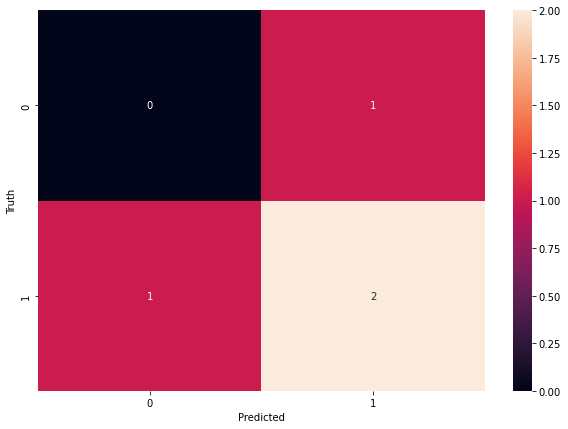

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
display(y_test)
display(y_pred)

5     1
8     0
9     1
14    1
Name: salary_more_then_100k, dtype: int64

array([0, 1, 1, 1], dtype=int64)

In [41]:
model.score(x,y)

0.875

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

google - 2

abc pharama - 0

facebook - 1

#
sales exec - 2

computer programmer - 1

bussiness manager - 0

#
bacherler - 0 
master - 1

In [48]:
df

company                  job     degree  salary_more_then_100k  \
0       google      sales executive  bachelors                      0   
1       google      sales executive    masters                      0   
2       google     business manager  bachelors                      1   
3       google     business manager    masters                      1   
4       google  computer programmer  bachelors                      0   
5       google  computer programmer    masters                      1   
6   abc pharma      sales executive    masters                      0   
7   abc pharma  computer programmer  bachelors                      0   
8   abc pharma     business manager  bachelors                      0   
9   abc pharma     business manager    masters                      1   
10    facebook      sales executive  bachelors                      1   
11    facebook      sales executive    masters                      1   
12    facebook     business manager  bachelors                      1   
13    facebook     business manager    masters                      1   
14    facebook  computer programmer  bachelors                      1   
15    facebook  computer programmer    masters                      1   

    company_new  job_new  degree_new  
0             2        2           0  
1             2        2           1  
2             2        0           0  
3             2        0           1  
4             2        1           0  
5             2        1           1  
6             0        2           1  
7             0        1           0  
8             0        0           0  
9             0        0           1  
10            1        2           0  
11            1        2           1  
12            1        0           0  
13            1        0           1  
14            1        1           0  
15            1        1           1

In [49]:
model.predict([[0,2,0]]) # abc pharma computer bacheler

C:\Users\d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [52]:
model.predict([[1,1,0]]) # abc pharma computer bacheler

C:\Users\d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [53]:
model.predict([[2,1,0]])

C:\Users\d\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [15]:
model.predict([[2,1,1]])

array([1], dtype=int64)

# Advantages of the Decision Tree:

 - It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
- It can be very useful for solving decision-related problems.
- It helps to think about all the possible outcomes for a problem.
- There is less requirement of data cleaning compared to other algorithms.

# Disadvantages of the Decision Tree:

- The decision tree contains lots of layers, which makes it complex.
- It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
- For more class labels, the computational complexity of the decision tree may increase.

**Exercise: Build decision tree model to predict survival based on certain parameters**

<img src="titanic.jpg" height=200 width=400/>

CSV file is available to download at
https://drive.google.com/file/d/1JfhpdCg-hBdEG0cYRFCeBSwKHyDzHJcY/view?usp=sharing

##### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

##### Calculate score of your model

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\ELCOT\\Downloads")

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [26]:
data = pd.read_csv('titanic.csv')
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [27]:
data.dropna(inplace=True)   # Drop rows with missing values
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # Convert 'Sex' to numerical values

In [28]:
data=data.reset_index()
data

index  PassengerId  Survived  Pclass  \
0        1            2         1       1   
1        3            4         1       1   
2        6            7         0       1   
3       10           11         1       3   
4       11           12         1       1   
..     ...          ...       ...     ...   
178    871          872         1       1   
179    872          873         0       1   
180    879          880         1       1   
181    887          888         1       1   
182    889          890         1       1   

                                                  Name  Sex   Age  SibSp  \
0    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
1         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
2                              McCarthy, Mr. Timothy J    1  54.0      0   
3                      Sandstrom, Miss. Marguerite Rut    0   4.0      1   
4                             Bonnell, Miss. Elizabeth    0  58.0      0   
..                                                 ...  ...   ...    ...   
178   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)    0  47.0      1   
179                           Carlsson, Mr. Frans Olof    1  33.0      0   
180      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)    0  56.0      0   
181                       Graham, Miss. Margaret Edith    0  19.0      0   
182                              Behr, Mr. Karl Howell    1  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
0        0  PC 17599  71.2833          C85        C  
1        0    113803  53.1000         C123        S  
2        0     17463  51.8625          E46        S  
3        1   PP 9549  16.7000           G6        S  
4        0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
178      1     11751  52.5542          D35        S  
179      0       695   5.0000  B51 B53 B55        S  
180      1     11767  83.1583          C50        C  
181      0    112053  30.0000          B42        S  
182      0    111369  30.0000         C148        C  

[183 rows x 13 columns]

In [15]:
x = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 100, criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [31]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [32]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [33]:
y_test

118    0
251    0
742    1
544    0
712    1
96     0
139    0
337    1
577    1
492    0
487    0
765    1
339    0
835    1
262    0
97     1
291    1
209    1
429    1
307    1
779    1
609    1
707    1
183    1
54     0
618    1
318    1
110    0
717    1
556    1
369    1
305    1
583    0
710    1
332    0
177    0
853    1
Name: Survived, dtype: int64

In [34]:
score = accuracy_score(y_test, y_pred)
print("Model Accuracy:", score)

Model Accuracy: 0.7837837837837838
